In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
AF_data = pd.read_csv('C:/Users/matte/Downloads/Away Fouls/AF_clean.csv')
AF_data

,Div,Day_Time,HomeTeam,AwayTeam,FTR,HTR,FTHG,FTAG,TGG,HTHG,HTAG,THGG,HS,AS,HST,AST,HF,HC,AC,HY,AY,HR,AR,AvgC_greater_than_2.5,AvgC_less_than_2.5,AF
0,0.0,1.0,11.0,0.0,0.0,0.0,0,4,4,0,1,1,6,25,1,10,16,0,6,2,1,0,0,1.34,3.29,11
1,0.0,2.0,13.0,3.0,1.0,1.0,4,4,8,3,3,6,20,9,8,6,9,8,7,1,2,0,0,1.62,2.31,14
2,0.0,2.0,9.0,7.0,0.0,0.0,1,2,3,0,2,2,24,17,5,8,9,4,2,0,1,0,0,1.65,2.26,9
3,0.0,2.0,4.0,2.0,2.0,2.0,3,2,5,2,1,3,11,13,7,6,13,4,5,1,2,0,0,1.68,2.19,10
4,0.0,2.0,10.0,15.0,2.0,2.0,5,0,5,2,0,2,19,4,9,1,5,7,0,1,1,0,0,1.64,2.26,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,4.0,2.0,25.4,7.4,0.0,1.0,1,3,4,1,1,2,7,20,5,11,6,3,10,1,1,0,0,1.55,2.45,14
8951,4.0,1.0,9.4,15.4,1.0,2.0,1,1,2,1,0,1,13,13,5,11,15,7,3,3,3,0,0,1.35,3.14,17
8952,4.0,1.0,16.4,10.4,2.0,2.0,3,0,3,3,0,3,4,13,4,3,8,4,9,4,0,2,1,1.50,2.55,13
8953,4.0,1.0,21.4,27.4,0.0,1.0,3,4,7,2,2,4,12,18,8,11,3,5,4,0,2,0,0,1.32,3.34,7


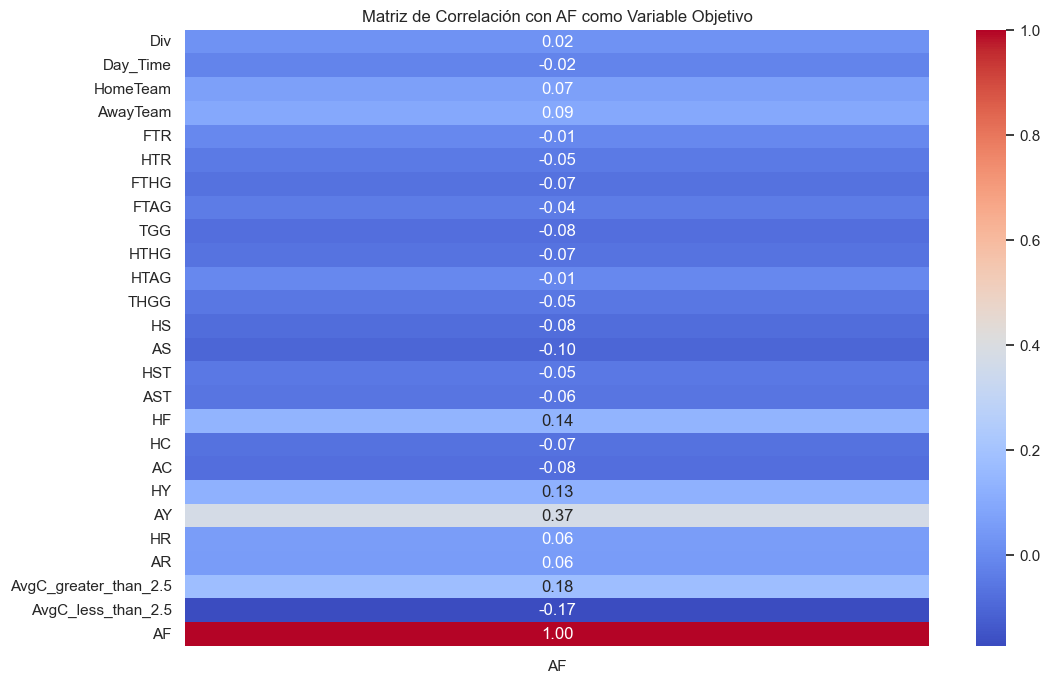

In [3]:
# Lista de variables objetivo
objective_variables = ['AF']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos
    final_data = AF_data.select_dtypes(include=['number'])

    # Crear la matriz de correlación para la variable objetivo actual
    correlation_matrix = final_data.corr()
    
    # Crear un mapa de calor para visualizar la matriz de correlación
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix[[target_variable]], annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Matriz de Correlación con {target_variable} como Variable Objetivo')
    plt.show()

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Lista de variables objetivo
objective_variables = ['AF']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos excluyendo la variable objetivo actual
    final_data = AF_data.select_dtypes(include=['number']).drop(columns=target_variable)
    
    # Agregar la variable objetivo al principio del DataFrame
    final_data = AF_data[[target_variable] + final_data.columns.tolist()]
    
    # Calcular VIF para cada característica en relación a la variable objetivo
    vif_data = pd.DataFrame()
    vif_data["Feature"] = final_data.columns
    vif_data["VIF"] = [variance_inflation_factor(final_data.values, i) for i in range(final_data.shape[1])]
    
    # Mostrar los resultados de VIF
    print(f"VIF para {target_variable}:")
    print(vif_data)

VIF para AF:
                  Feature        VIF
0                      AF  12.963623
1                     Div   3.399003
2                Day_Time   6.392247
3                HomeTeam   4.216310
4                AwayTeam   3.906049
5                     FTR  11.358905
6                     HTR  16.962277
7                    FTHG        inf
8                    FTAG        inf
9                     TGG        inf
10                   HTHG        inf
11                   HTAG        inf
12                   THGG        inf
13                     HS  17.750269
14                     AS  15.200605
15                    HST  11.179843
16                    AST   9.926705
17                     HF  13.024896
18                     HC   6.332470
19                     AC   5.572715
20                     HY   3.890636
21                     AY   4.237433
22                     HR   1.185694
23                     AR   1.191684
24  AvgC_greater_than_2.5  28.075621
25     AvgC_less_than_2.5

In [5]:
AF_data.columns

Index(['Div', 'Day_Time', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'FTHG', 'FTAG',
       'TGG', 'HTHG', 'HTAG', 'THGG', 'HS', 'AS', 'HST', 'AST', 'HF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'AvgC_greater_than_2.5',
       'AvgC_less_than_2.5', 'AF'],
      dtype='object')

In [6]:
# Eliminar las columnas especificadas
columns_to_drop = ['Div', 'Day_Time', 'HTR', 'TGG', 'THGG', 'AvgC_greater_than_2.5',
       'AvgC_less_than_2.5']
AF_data = AF_data.drop(columns=columns_to_drop, errors='ignore')
AF_data

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,HC,AC,HY,AY,HR,AR,AF
0,11.0,0.0,0.0,0,4,0,1,6,25,1,10,16,0,6,2,1,0,0,11
1,13.0,3.0,1.0,4,4,3,3,20,9,8,6,9,8,7,1,2,0,0,14
2,9.0,7.0,0.0,1,2,0,2,24,17,5,8,9,4,2,0,1,0,0,9
3,4.0,2.0,2.0,3,2,2,1,11,13,7,6,13,4,5,1,2,0,0,10
4,10.0,15.0,2.0,5,0,2,0,19,4,9,1,5,7,0,1,1,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,25.4,7.4,0.0,1,3,1,1,7,20,5,11,6,3,10,1,1,0,0,14
8951,9.4,15.4,1.0,1,1,1,0,13,13,5,11,15,7,3,3,3,0,0,17
8952,16.4,10.4,2.0,3,0,3,0,4,13,4,3,8,4,9,4,0,2,1,13
8953,21.4,27.4,0.0,3,4,2,2,12,18,8,11,3,5,4,0,2,0,0,7


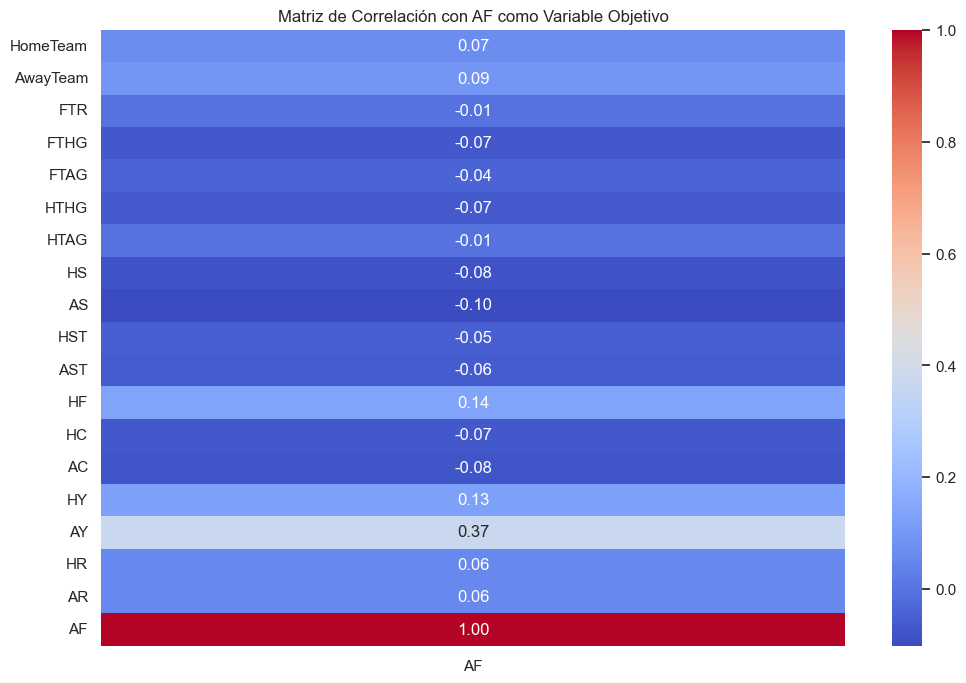

In [7]:
# Lista de variables objetivo
objective_variables = ['AF']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos
    final_data = AF_data.select_dtypes(include=['number'])

    # Crear la matriz de correlación para la variable objetivo actual
    correlation_matrix = final_data.corr()
    
    # Crear un mapa de calor para visualizar la matriz de correlación
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix[[target_variable]], annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Matriz de Correlación con {target_variable} como Variable Objetivo')
    plt.show()

In [8]:
# Lista de variables objetivo
objective_variables = ['AF']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos excluyendo la variable objetivo actual
    final_data = AF_data.select_dtypes(include=['number']).drop(columns=target_variable)
    
    # Agregar la variable objetivo al principio del DataFrame
    final_data = AF_data[[target_variable] + final_data.columns.tolist()]
    
    # Calcular VIF para cada característica en relación a la variable objetivo
    vif_data = pd.DataFrame()
    vif_data["Feature"] = final_data.columns
    vif_data["VIF"] = [variance_inflation_factor(final_data.values, i) for i in range(final_data.shape[1])]
    
    # Mostrar los resultados de VIF
    print(f"VIF para {target_variable}:")
    print(vif_data)

VIF para AF:
     Feature        VIF
0         AF  11.090962
1   HomeTeam   3.758360
2   AwayTeam   3.783218
3        FTR   9.490971
4       FTHG   9.587882
5       FTAG   8.040457
6       HTHG   3.352298
7       HTAG   3.071004
8         HS  15.723554
9         AS  14.150863
10       HST  11.005132
11       AST   9.811456
12        HF  11.000672
13        HC   6.028532
14        AC   5.371655
15        HY   3.877662
16        AY   4.218842
17        HR   1.183945
18        AR   1.188959


In [9]:
# Eliminar las columnas especificadas
columns_to_drop = ['HST', 'AST', 'HC', 'AC']
AF_data = AF_data.drop(columns=columns_to_drop, errors='ignore')
AF_data

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HTHG,HTAG,HS,AS,HF,HY,AY,HR,AR,AF
0,11.0,0.0,0.0,0,4,0,1,6,25,16,2,1,0,0,11
1,13.0,3.0,1.0,4,4,3,3,20,9,9,1,2,0,0,14
2,9.0,7.0,0.0,1,2,0,2,24,17,9,0,1,0,0,9
3,4.0,2.0,2.0,3,2,2,1,11,13,13,1,2,0,0,10
4,10.0,15.0,2.0,5,0,2,0,19,4,5,1,1,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,25.4,7.4,0.0,1,3,1,1,7,20,6,1,1,0,0,14
8951,9.4,15.4,1.0,1,1,1,0,13,13,15,3,3,0,0,17
8952,16.4,10.4,2.0,3,0,3,0,4,13,8,4,0,2,1,13
8953,21.4,27.4,0.0,3,4,2,2,12,18,3,0,2,0,0,7


In [10]:
# Lista de variables objetivo
objective_variables = ['AF']

# Iterar sobre cada variable objetivo
for target_variable in objective_variables:
    # Crear un subconjunto de datos numéricos excluyendo la variable objetivo actual
    final_data = AF_data.select_dtypes(include=['number']).drop(columns=target_variable)
    
    # Agregar la variable objetivo al principio del DataFrame
    final_data = AF_data[[target_variable] + final_data.columns.tolist()]
    
    # Calcular VIF para cada característica en relación a la variable objetivo
    vif_data = pd.DataFrame()
    vif_data["Feature"] = final_data.columns
    vif_data["VIF"] = [variance_inflation_factor(final_data.values, i) for i in range(final_data.shape[1])]
    
    # Mostrar los resultados de VIF
    print(f"VIF para {target_variable}:")
    print(vif_data)

VIF para AF:
     Feature        VIF
0         AF  11.058914
1   HomeTeam   3.686511
2   AwayTeam   3.730733
3        FTR   9.370548
4       FTHG   8.429664
5       FTAG   7.283407
6       HTHG   3.336469
7       HTAG   3.058862
8         HS   7.038954
9         AS   6.701100
10        HF  10.954824
11        HY   3.875670
12        AY   4.216567
13        HR   1.183152
14        AR   1.188726


In [11]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = AF_data.drop(columns=['AF'])  # Características excluyendo la variable objetivo
y = AF_data['AF']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Inicializar el modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Hacer predicciones sobre el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 13.050855499720827
R^2 Score: 0.17030016901205003


In [14]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15]
}

# Inicializar el GridSearchCV con el modelo Random Forest
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # Número de divisiones para la validación cruzada
                           scoring='r2',  # Métrica de evaluación
                           verbose=1,
                           n_jobs=-1)  # Utilizar todos los núcleos de CPU disponibles

# Entrenar GridSearchCV en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Obtener el mejor modelo entrenado
best_rf_model = grid_search.best_estimator_

# Hacer predicciones y evaluar el modelo ajustado
y_pred_grid = best_rf_model.predict(X_test)
r2_grid = r2_score(y_test, y_pred_grid)
print(f"R^2 Score después de ajuste de hiperparámetros: {r2_grid}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Mejores hiperparámetros encontrados:
{'max_depth': 10, 'min_samples_split': 15, 'n_estimators': 300}
R^2 Score después de ajuste de hiperparámetros: 0.19182857580560275


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo con los mejores hiperparámetros
rf = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=15)

# Entrenar el modelo con los datos limpios TGG_data
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=15, n_estimators=300)

In [16]:
importances = rf.feature_importances_

In [17]:
feature_names = list(X_train.columns)  # Obtener nombres de características si X_train es un DataFrame

# Crear un DataFrame de importancias de características
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar las características por importancia descendente
feature_importances = feature_importances.sort_values('Importance', ascending=False).reset_index(drop=True)

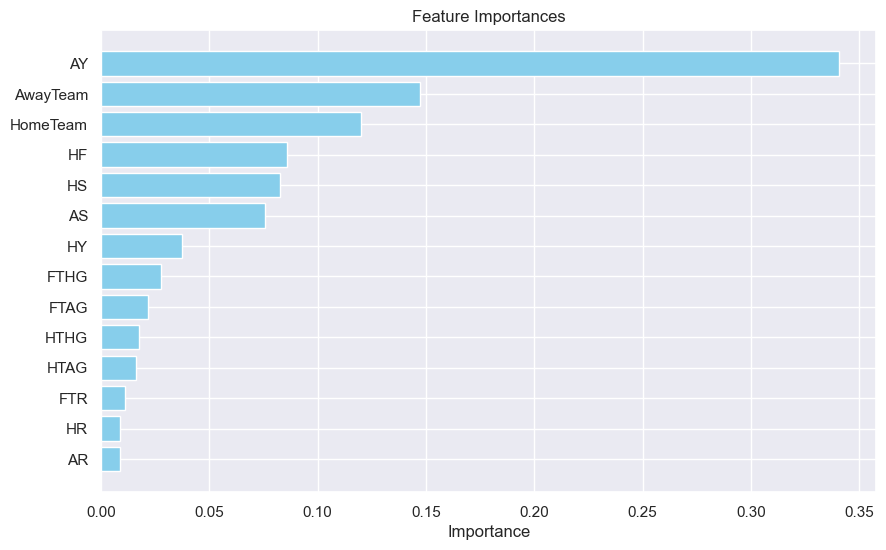

In [18]:
# Graficar las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

In [19]:
# Definir la variable objetivo específica
target_variable = 'AF'

# Seleccionar variables numéricas excluyendo la variable objetivo
X = AF_data.drop(columns=[target_variable])
y = AF_data[target_variable]

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Obtener la importancia de las variables
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Mostrar importancia de las variables para 'TGG' en el modelo de Random Forest
print(f"\nImportancia de las variables para '{target_variable}' en el modelo de Random Forest:")
for i, idx in enumerate(indices):
    print(f"{i+1}. {X.columns[idx]}: {importances[idx]}")


Importancia de las variables para 'AF' en el modelo de Random Forest:
1. AwayTeam: 0.15804663394531343
2. HomeTeam: 0.1545063237192466
3. AY: 0.1459579304436213
4. HS: 0.10275661025495594
5. HF: 0.10104656151245062
6. AS: 0.09984483312646115
7. HY: 0.057611067903582044
8. FTHG: 0.042762338969574626
9. FTAG: 0.03761507930535702
10. HTHG: 0.02885018610154595
11. HTAG: 0.026977237171037678
12. FTR: 0.021502562829982794
13. AR: 0.011379874650625805
14. HR: 0.011142760066245155


In [56]:
AF_data

,Div,Day_Time,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HTHG,HTAG,HST,AST,HC,AC,HY,AY,HR,AR,AvgCH,AvgCA,AF
0,0.0,1.0,129,14,0.0,0,4,0,1,1,10,0,6,2,1,0,0,8.69,1.31,11
1,0.0,2.0,11,76,1.0,4,4,3,3,8,6,8,7,1,2,0,0,2.79,2.42,14
2,0.0,2.0,57,47,0.0,1,2,0,2,5,8,4,2,0,1,0,0,2.20,3.15,9
3,0.0,2.0,70,98,2.0,3,2,2,1,7,6,4,5,1,2,0,0,2.44,2.81,10
4,0.0,2.0,115,18,2.0,5,0,2,0,9,1,7,0,1,1,0,0,1.76,4.32,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,4.0,2.0,111,45,0.0,1,3,1,1,5,11,3,10,1,1,0,0,7.08,1.42,14
8951,4.0,1.0,19,116,1.0,1,1,1,0,5,11,7,3,3,3,0,0,1.82,3.85,17
8952,4.0,1.0,50,126,2.0,3,0,3,0,4,3,4,9,4,0,2,1,1.67,4.62,13
8953,4.0,1.0,64,97,0.0,3,4,2,2,8,11,5,4,0,2,0,0,1.55,5.05,7


In [27]:
# Ajusta new_data para que coincida con las columnas de entrenamiento
new_data6 = pd.DataFrame({
    'HomeTeam': [1.10],  
    'AwayTeam': [0.10],
    'FTR': [2.0],
    'FTHG': [5],
    'FTAG': [1],
    'HTHG': [2],
    'HTAG': [0],  
    'HS': [13],
    'AS': [15],
    'HF': [17],
    'HY': [2],
    'AY': [2],
    'HR': [0],
    'AR': [0],
})
# Hacer la predicción utilizando el modelo entrenado
predicted_AF = rf_model.predict(new_data6)
print(f"Predicción de AF para el nuevo partido: {predicted_AF}")

Predicción de AF para el nuevo partido: [10.04]
